## Ensure that you have relevant data in data_untracked

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.metrics import (
    classification_report, roc_auc_score, average_precision_score, auc,
    precision_recall_curve, precision_recall_fscore_support,roc_curve
)

parent_dir = os.path.dirname(os.getcwd())
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
    
from create_labels import labels
from extract_data import extract 
from create_features import features
from preprocess_feature import preprocess
from path_location import folder_location

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

### Download below required if creating footnote analysis file

In [3]:
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download("wordnet")
# nltk.download("averaged_perceptron_tagger")

___
## Section 1. Create Data
___

### Extract form 4 data if missing

In [3]:
data_extractor = extract.Data_Extractor()
data_extractor.create_form4()
data_extractor.merge_form4()

========== Required SEC files present ==========
========== Required merged transactions present ==========


### Create labels

In [4]:
# Create data labels if missing
label_data_creator = labels.Label_Data_Creator()
label_data_creator.create_labels()

========== Required labelled files present ==========
========== Skip data label creation ==========
========== Reading of merged_txns_SNORKEL.csv successful with shape (3171001, 108) ==========


### Create features

In [5]:
feature_data_creator = features.Feature_Data_Creator()
feature_data_creator.create_features()

=== Final features file not found. Begin creating ===
=== Network time_independent_features file is found. Extracting ===
=== Network time_dependent_features file is found. Extracting ===
=== Network zscore_features file is found. Extracting ===
=== Transaction Key file is found. Extracting ===
=== Footnote Key file is found. Extracting ===
=== Other Features Key file is found. Extracting ===
=== Removing unwanted rows ===
=== Before removal length 3171001 === 
=== After removal length 1786525 === 
=== Saving file ===


### Create training and testing data

In [6]:
feature_preprocessor = preprocess.Feature_Preprocessor()
feature_preprocessor.extract()
feature_preprocessor.create_training_testing()

preprocess is_lobby with type object
preprocess has_lobby with type object
preprocess has_donate with type object
preprocess NODEID with type float64
preprocess important_connections with type int64
preprocess full_congress_connections with type int64
preprocess house_t2_important_connections with type int64
preprocess house_t2_full_congress_connections with type int64
preprocess house_t1_important_connections with type int64
preprocess house_t1_full_congress_connections with type int64
preprocess sen_important_connections with type int64
preprocess sen_full_congress_connections with type int64
preprocess sen_t2_important_connections with type int64
preprocess sen_t2_full_congress_connections with type int64
preprocess sen_t1_important_connections with type int64
preprocess sen_t1_full_congress_connections with type int64
preprocess full_congress_connections_z with type float64
preprocess sen_full_congress_connections_z with type float64
preprocess sen_t2_full_congress_connections_z wi

In [7]:
feature_preprocessor_baseline = preprocess.Feature_Preprocessor()
feature_preprocessor_baseline.extract(["TRANS_CODE"])
feature_preprocessor.baseline_create_training_testing()

preprocess TRANS_CODE with type object
=== Begin creating based on quantile: 0.8
=== Saving baseline Training and Testing ===


___
## Section 2. Modelling, Training and Validation
___

### See the individual modelling, training and validation from notebooks in `src/models`

In [8]:
print("features:")
print(feature_data_creator.features)

features:
['js_bin', 's_bin', 'b_bin', 'jb_bin', 'ob_bin', 'gb_bin', 'gift', 'distribution', 'charity', 'price', 'number', 'ball', 'pursuant', '10b5-1', '16b-3', 'net_trading_intensity', 'net_trading_amt', 'relative_trade_size_to_self', 'beneficial_ownership_score', 'title_score', 'TRANS_TIMELINESS_clean', 'execution_timeliness', 'filing_lag_days', 'filing_timeliness', 'security_category', 'trans_amt', 'is_lobby', 'has_lobby', 'has_donate', 'NODEID', 'important_connections', 'full_congress_connections', 'house_t2_important_connections', 'house_t2_full_congress_connections', 'house_t1_important_connections', 'house_t1_full_congress_connections', 'sen_important_connections', 'sen_full_congress_connections', 'sen_t2_important_connections', 'sen_t2_full_congress_connections', 'sen_t1_important_connections', 'sen_t1_full_congress_connections', 'full_congress_connections_z', 'sen_full_congress_connections_z', 'sen_t2_full_congress_connections_z', 'house_t2_full_congress_connections_z', 'sen_

In [2]:
PROCESSED_FOLDER = folder_location.PROCESSED_DATA_FOLDER
TRAINING_FILE = folder_location.TRAINING_FULL_FEATURES_FILE
TESTING_FILE = folder_location.TESTING_FULL_FEATURES_FILE

train = pd.read_csv(f"{PROCESSED_FOLDER}/{TRAINING_FILE}", parse_dates=["TRANS_DATE"])
test = pd.read_csv(f"{PROCESSED_FOLDER}/{TESTING_FILE}", parse_dates=["TRANS_DATE"])

In [3]:
COLS_TO_DROP = ['TRANS_SK','ACCESSION_NUMBER','ISSUERTRADINGSYMBOL','NODEID','RPTOWNERNAME_;',
                'snorkel_prob', 'TRANS_DATE',
                "ppr_house_0.85", "ppr_house_0.95", "ppr_senate_0.85", "ppr_senate_0.95", "ppr_topK_exp"] 
LABEL = 'y_pred'

test_challenger_1_x = test.drop(columns=COLS_TO_DROP + [LABEL])
test_challenger_1_y = test[LABEL]

### Size of dataset

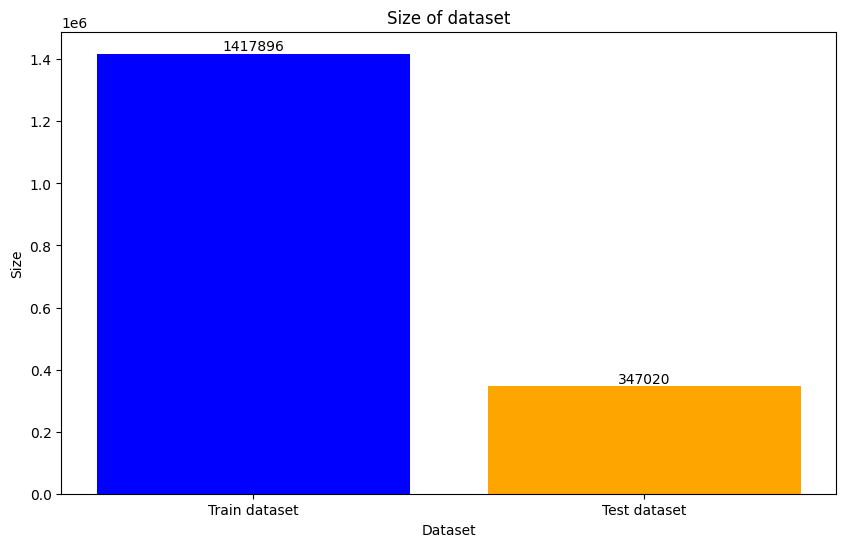

In [15]:
dataset = ['Train dataset', 'Test dataset']
size = [len(train), len(test)]

plt.figure(figsize=(10, 6))

# Create bar plot
bars = plt.bar(dataset, size, color = ["blue", "orange"])
plt.title('Size of dataset')
plt.xlabel('Dataset')
plt.ylabel('Size')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height),
             ha="center", va="bottom", fontsize=10) 

# Show plot
plt.show()

### Proportion of dataset

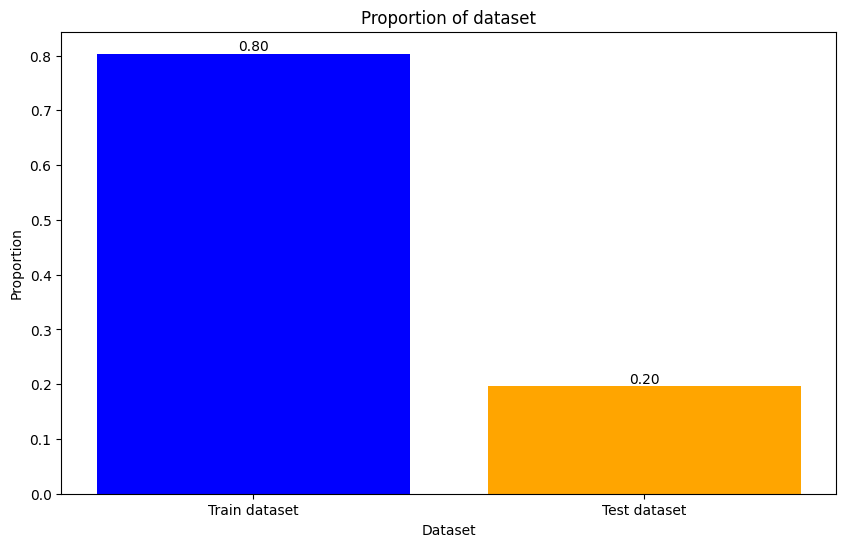

In [17]:
dataset = ['Train dataset', 'Test dataset']
total = len(train) + len(test)
size = [len(train)/total, len(test)/total]

plt.figure(figsize=(10, 6))

# Create bar plot
bars = plt.bar(dataset, size, color = ["blue", "orange"])
plt.title('Proportion of dataset')
plt.xlabel('Dataset')
plt.ylabel('Proportion')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f"{height:.2f}",
             ha="center", va="bottom", fontsize=10) 

# Show plot
plt.show()

___
## Compare results
___

### Helper functions

In [4]:
# -----------------------------------------------------------------------------
# Helper: Find threshold to meet target recall
# -----------------------------------------------------------------------------
def find_threshold_for_recall(y_true, probs, target_recall=0.75, num_steps=200):
    thresholds = np.linspace(0, 1, num_steps)
    best_thr, best_diff = 0.5, float("inf")
    for thr in thresholds:
        y_pred = (probs >= thr).astype(int)
        _, rec, _, _ = precision_recall_fscore_support(
            y_true, y_pred, average="binary", zero_division=0
        )
        diff = abs(rec - target_recall)
        if diff < best_diff:
            best_diff, best_thr = diff, thr
    return best_thr

# -----------------------------------------------------------------------------
# Helper: Plot precision-recall curve
# -----------------------------------------------------------------------------

def plot_precision_recall_curve(y_test, y_probs, title):
    # Compute precision-recall pairs
    precision, recall, pr_thresholds = precision_recall_curve(y_test, y_probs)
    pr_auc = auc(recall, precision)
    avg_precision = average_precision_score(y_test, y_probs)

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = roc_auc_score(y_test, y_probs)
    
    print("Area under PR curvere:", round(pr_auc,3))
    print("Average precision score:", round(avg_precision,3))
    print("Area under ROC curve", round(roc_auc,3)) 

    # Create side-by-side plots
    _, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

    # Plot Precision-Recall curve
    axs[0].plot(recall, precision, color='blue', label=f"PR AUC = {pr_auc:.4f}")
    axs[0].set_xlabel("Recall")
    axs[0].set_ylabel("Precision")
    axs[0].set_title(f"Precision-Recall Curve {title}")
    axs[0].grid(True)
    axs[0].legend()

    # Plot ROC curve
    axs[1].plot(fpr, tpr, color='green', label=f"ROC AUC = {roc_auc:.4f}")
    axs[1].plot([0, 1], [0, 1], linestyle='--', color='gray')
    axs[1].set_xlabel("False Positive Rate")
    axs[1].set_ylabel("True Positive Rate")
    axs[1].set_title(f"ROC Curve {title}")
    axs[1].grid(True)
    axs[1].legend()

    plt.tight_layout()
    plt.show()

# -----------------------------------------------------------------------------
# Helper: Get evalutaion metrics (classification report for best threshold and plot curves)
# -----------------------------------------------------------------------------
def get_eval_metrics(y_true, y_probs, title, target_recall=0.75):
    # Find the best threshold for the target recall
    best_thr = find_threshold_for_recall(y_true, y_probs, target_recall)

    print(f"Best threshold for recall {target_recall}: {best_thr:.4f}")
    y_pred = (y_probs >= best_thr).astype(int)

    print("\n=== Classification Report ===")
    print(f"\nThreshold for recall={target_recall} ⇒ {best_thr:.3f}")
    print(classification_report(y_true, y_pred, digits=3))

    plot_precision_recall_curve(y_true, y_probs, title)
    
# -----------------------------------------------------------------------------
# Plot: Feature Importance for Random Forest
# -----------------------------------------------------------------------------
# def plot_feature_importance(pipe, X, title):
#     model = pipe.named_steps['clf']
#     n = len(X.columns)
#     importances = model.feature_importances_
#     indices = np.argsort(importances)[::-1][:n]

#     plt.figure(figsize=(15, 20))
#     plt.barh(range(n), importances[indices][::-1], align='center')
#     plt.yticks(range(n), [X.columns[i] for i in indices][::-1])
#     plt.xlabel("Feature Importance")
#     plt.title(f"Feature Importance {title}")
#     plt.tight_layout()
#     plt.show()

# # -----------------------------------------------------------------------------
# # Helper: Plot permutation importance for MLP
# # -----------------------------------------------------------------------------
# def plot_permutation_importance(pipe, X_test, y_test, title):
#     # Compute permutation importance
#     print("Computing permutation importance")
#     result = permutation_importance(pipe, X_test, y_test, n_repeats=10, random_state=42)
#     # Create a DataFrame for better visualization
#     importances_df = pd.DataFrame({
#         'feature': X_test.columns,
#         'importance': result.importances_mean,
#         'std': result.importances_std
#     }).sort_values(by='importance', ascending=False)

#     print("Top 10 features by permutation importance:")
#     print(importances_df.head(10))

#     # Plot the feature importances
#     plt.figure(figsize=(15, 20))
#     plt.barh(importances_df['feature'], importances_df['importance'], xerr=importances_df['std'])
#     plt.xlabel("Mean Importance (Decrease in Score)")
#     plt.title(f"Permutation Importance {title}")
#     plt.gca().invert_yaxis()
#     plt.tight_layout()
#     plt.show()

In [6]:
MODELS_FOLDER = folder_location.MODELS_FOLDER
CHALLENGER_1 = folder_location.CHALLENGER_1
BASELINE = folder_location.BASELINE

In [7]:
features_to_use = [
    "execution_timeliness_after_trans", "execution_timeliness_before_trans", "execution_timeliness_on_trans",
    "filing_timeliness_early_filing", "filing_timeliness_late_filing", "filing_timeliness_on_time_filing",
    "filing_lag_days", "TRANS_CODE_I", "TRANS_CODE_P", "TRANS_CODE_S", 'y_pred', "TRANS_CODE_G", "TRANS_CODE_J"
]
dtypes = {
    "execution_timeliness_after_trans": "float32",
    "execution_timeliness_before_trans": "float32",
    "execution_timeliness_on_trans": "float32",
    "filing_timeliness_early_filing": "int8",
    "filing_timeliness_late_filing": "int8",
    "filing_timeliness_on_time_filing": "int8",
    "filing_lag_days": "float32",
    "TRANS_CODE_I": "int8",
    "TRANS_CODE_P": "int8",
    "TRANS_CODE_S": "int8",
    "TRANS_CODE_G": "int8",
    "TRANS_CODE_J": "int8",
    "y_pred": "float32"
}
TRAINNG_BASE_FEATURES_FILE = folder_location.TRAINING_BASELINE_FULL_FEATURES_FILE
TESTING_BASE_FEATURES_FILE = folder_location.TESTING_BASELINE_FULL_FEATURES_FILE

train_base = pd.read_csv(f"{PROCESSED_FOLDER}/{TRAINNG_BASE_FEATURES_FILE}", usecols=features_to_use, dtype=dtypes)
test_base = pd.read_csv(f"{PROCESSED_FOLDER}/{TESTING_BASE_FEATURES_FILE}", usecols=features_to_use, dtype=dtypes)


In [8]:
test_baseline_x = test_base.drop(columns=[LABEL] + ["TRANS_CODE_G", "TRANS_CODE_J", "TRANS_CODE_I"])
test_baseline_y = test_base[LABEL]

Best threshold for recall 0.75: 0.2915

=== Classification Report ===

Threshold for recall=0.75 ⇒ 0.291
              precision    recall  f1-score   support

         0.0      0.635     0.302     0.410    213483
         1.0      0.393     0.723     0.509    133537

    accuracy                          0.464    347020
   macro avg      0.514     0.512     0.459    347020
weighted avg      0.542     0.464     0.448    347020

Area under PR curvere: 0.411
Average precision score: 0.407
Area under ROC curve 0.529


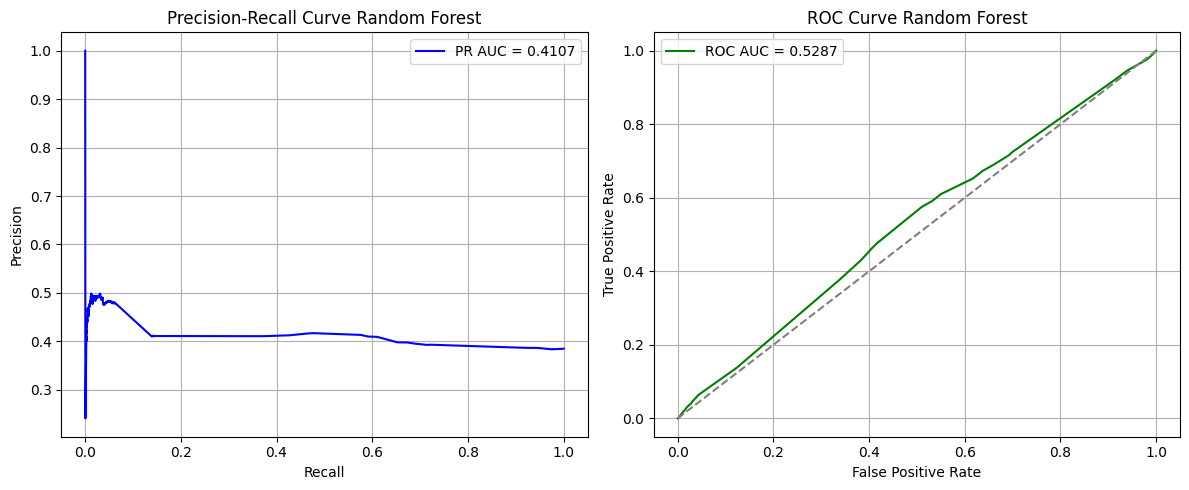

In [9]:
baseline = pickle.load(open(f"{MODELS_FOLDER}/{BASELINE}", 'rb'))
y_probs_base = baseline.predict_proba(test_baseline_x)[:, 1]
get_eval_metrics(test_baseline_y, y_probs_base, "Random Forest", target_recall=0.75)

### Challenger 1

In [11]:
COLS_TO_DROP = ['TRANS_SK','ACCESSION_NUMBER','ISSUERTRADINGSYMBOL','NODEID','RPTOWNERNAME_;',
                'snorkel_prob', 'TRANS_DATE',
                "ppr_house_0.85", "ppr_house_0.95", "ppr_senate_0.85", "ppr_senate_0.95", "ppr_topK_exp"] 
LABEL = 'y_pred'

test2 = test[test['TRANS_DATE'].dt.year < 2020]

test_challenger_1_x = test2.drop(columns=COLS_TO_DROP + [LABEL])
test_challenger_1_y = test2[LABEL]

Best threshold for recall 0.75: 0.4824

=== Classification Report ===

Threshold for recall=0.75 ⇒ 0.482
              precision    recall  f1-score   support

           0      0.711     0.494     0.583    103106
           1      0.544     0.750     0.631     82993

    accuracy                          0.608    186099
   macro avg      0.627     0.622     0.607    186099
weighted avg      0.636     0.608     0.604    186099

Area under PR curvere: 0.597
Average precision score: 0.597
Area under ROC curve 0.67


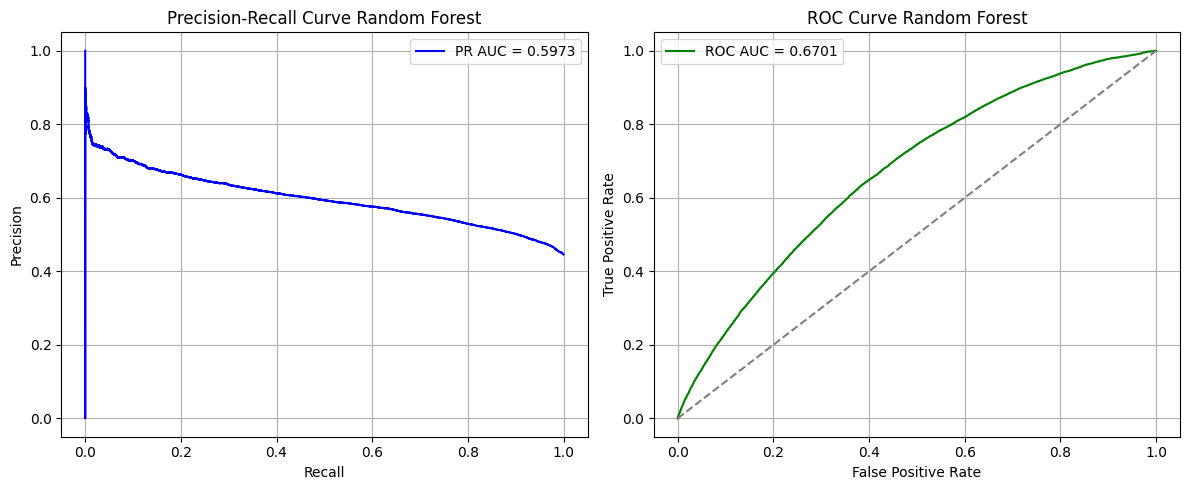

In [12]:
challenger_1 = pickle.load(open(f"{MODELS_FOLDER}/{CHALLENGER_1}", 'rb'))
y_probs_chal1 = challenger_1.predict_proba(test_challenger_1_x)[:, 1]
get_eval_metrics(test_challenger_1_y, y_probs_chal1, "Random Forest", target_recall=0.75)